

# Basic plotting using UETOOLS<a class="anchor" id="plotting"></a>
UETOOLS contains a wide array plotting tools for visualizing UEDGE results. Here, we will showcase some of the most central routines.

## TOC:
* [Plotting the grid](#grid)
* [Plotting colored meshes](#heatmap)
* [Plotting contours](#contour)
* [Plotting quiver plots](#quiver)
* [Plotting streamlines](#streamline)
* [Plotting target profiles](#1Dtarget)
* [Plotting 1D plots](#1Dplots)


In [1]:
# Restore the case
from os import chdir
chdir('testcase_hires')
from uetools import Case
c = Case('input.yaml') # Create a test at variable "c" from the YAML input file

UEDGE configuration file /Users/holm10/.uetoolsrc read.
savefile
UETOOLS-style save successfully restored from /Users/holm10/Documents/fusion/uedge/src/UETOOLS/jupyter/testcase_hires/nc20.hdf5

*** UEDGE arrays populated: Case appears converged ***
fnrm without preconditioning: 2.27e+00



## Plotting the grid<a class="anchor" id="grid"></a>
The grid function has a number of options that can be utilized to alter the style of the grid:

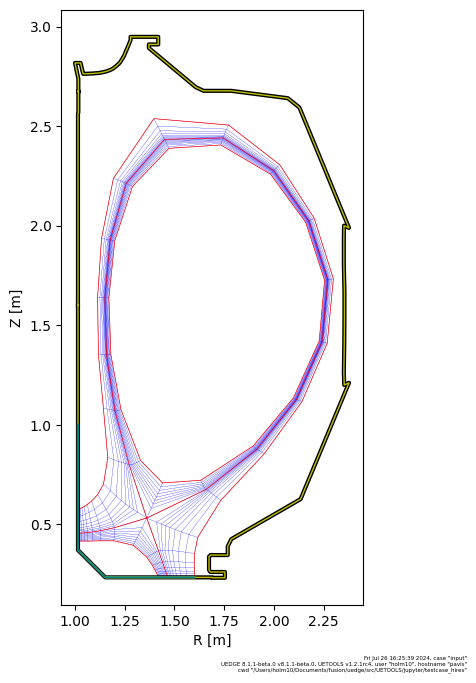

In [2]:
c.plot.grid(linewidth=0.1, 
       vessel=True, 
       plates=True, 
       platecolor=['gold','teal'], 
       lcfs=True, 
       lcfscolor='r', 
       linecolor='b'
      );

## Plotting colored meshes<a class="anchor" id="heatmap"></a>
Meshplots have a number of controls, in addition to those available to the grid function. Let's start by plotting the electron density.

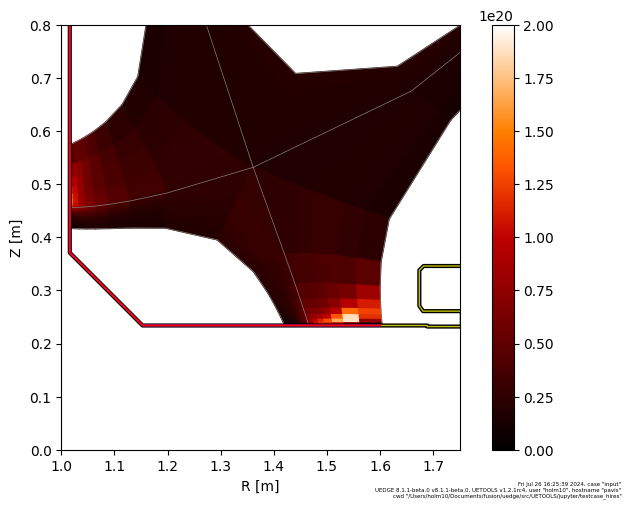

In [3]:
c.plot.mesh(
    c.get('ne'), 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    figsize=(7,5), 
    zrange=(0,2e20), 
    cmap='gist_heat'
);

Here, the Case-method 'get' is used to retrieve the electron density data from variable 'ne' of the 'bbb' package. The get command is directly interchangeable with the variable, e.g. 'bbb.ne'.

The heatmap can also be plotted on a logartihmic axis:

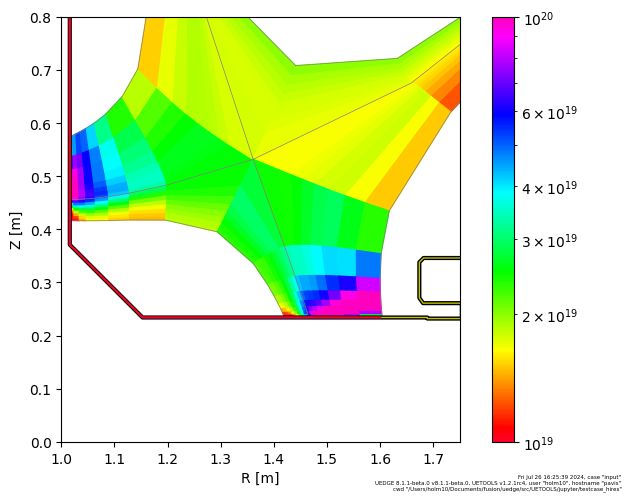

In [4]:
c.plot.mesh(
    bbb.ne, 
    log=True, 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    figsize=(7,5), 
    zrange=(1e19,1e20), 
    cmap='gist_rainbow'
);

When running an interactive session, the function variablemesh can be used to produce an interactive figure (not available in Jupyter notebooks).

In [ ]:
c.plot.variablemesh(
    bbb.ne,
    log=True, 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    figsize=(7,5), 
    zrange=(1e19,1e20), 
    cmap='gist_heat'
);

UETOOLS makes a number of pre-defined mesh plots available to the user, where all plotmesh-options are available to the user:
- ne2D
- te2D
- ni2D
- ti2D
- ng2D
- tg2D

Each of the above listed function can be supplied with the argument True to produce an interactive plot (e.g. ne2D(True), which is equivalent to ne2D(interactive=True).

## Contour plots<a class="anchor" id="contour"></a>
Here is shown an examples of plotting a contour of the electron temperature:

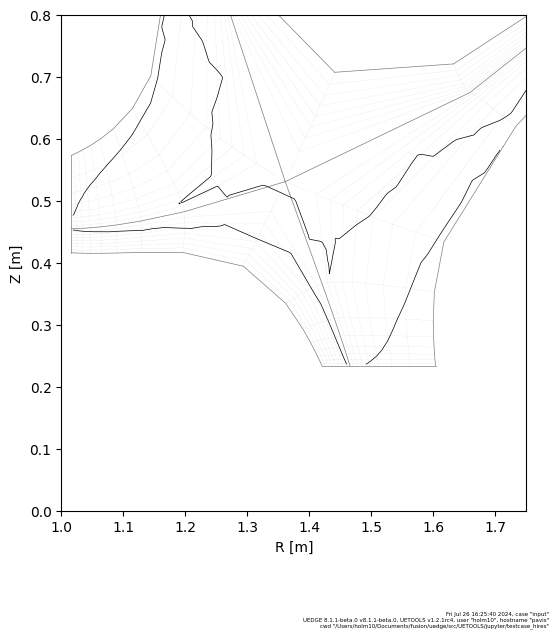

In [5]:
c.plot.contour(
    c.get('te')/c.get('ev'), 
    levels=[10,50], 
    labels=False, 
    xlim=(1, 1.75), 
    ylim=(0,0.8)
);

Here, Te has to be divided by the unit charge, since UEDGE evaluates the energy equation in Joules rather than eV.

The 'levels' argument specifies the value of the levels to be plotted or, in the case of a single int, the number of levels. In order to better distinguish the levels, they can be plotted sucessively with different line styles:

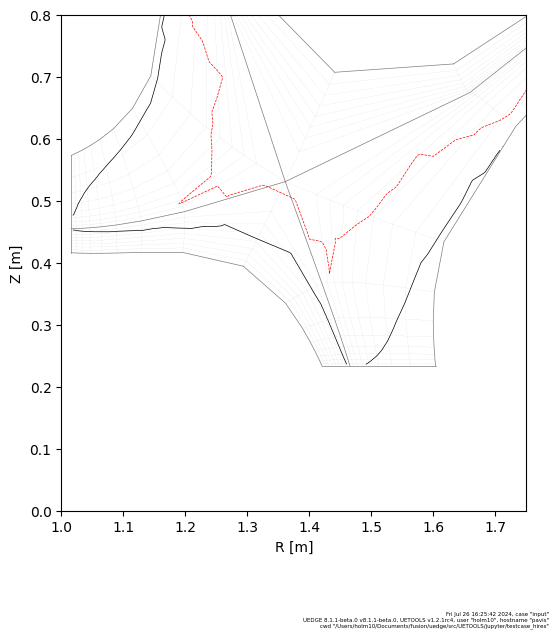

In [6]:
f=c.plot.contour(
    c.get('te')/c.get('ev'), 
    levels=[10], 
    labels=False, 
    xlim=(1, 1.75), 
    ylim=(0,0.8)
);
c.plot.contour(
    c.get('te')/c.get('ev'), 
    levels=[50], 
    labels=False, 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    ax=f, 
    linestyles='--', 
    color='r');

## Visualizing flows using quiver plots<a class="anchor" id="quiver"></a>
When visualizing flows or velocities, quiver-plots are useful tools available in UETOOLS:

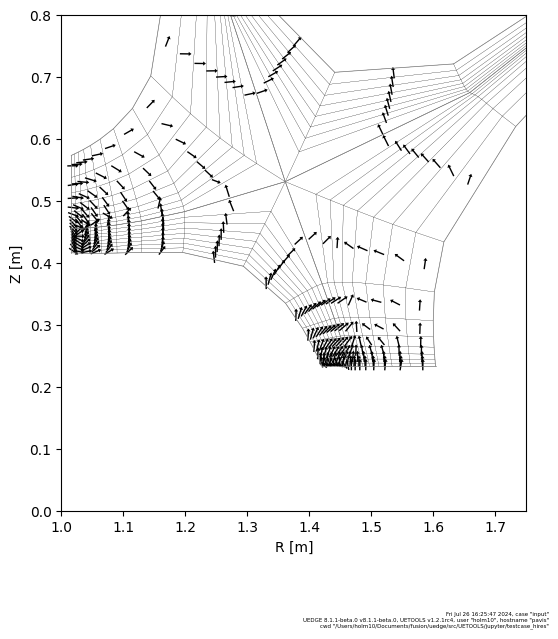

In [7]:
c.plot.quiver(
    c.get('fngx')[:,:,0], 
    c.get('fngy')[:,:,0], 
    uniformsize=True, 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    alpha=False
);

Here, the function expects 2D arrays with dimensions (nx, ny). However, the displayed gaseous flows have a third index, corresponding to the gaseous species: thus, the arrays have been sliced to be compatible with the plotting routine. The same applies for all 2D plotting routines.

## Plotting streamlines<a class="anchor" id="streamline"></a>
Sometimes, it might be more convenient to analyze flows in terms of streamlines:


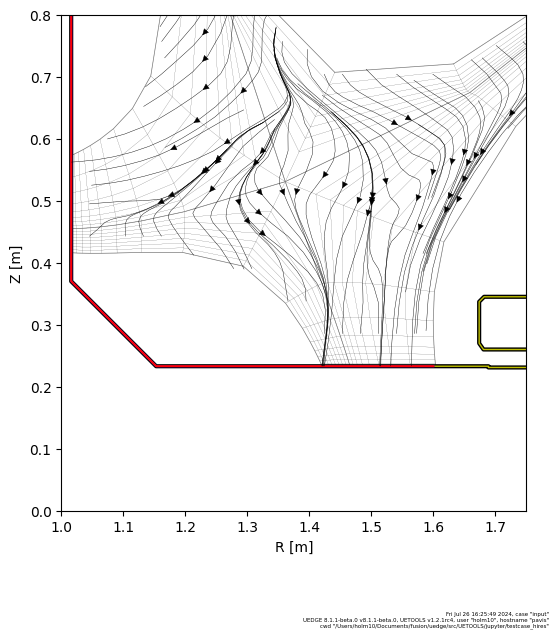

In [8]:
c.plot.streamline(
    c.get('fnix')[:,:,0], 
    c.get('fniy')[:,:,0], 
    linewidth=0.3, 
    xlim=(1, 1.75), 
    ylim=(0,0.8), 
    density=1.5
);

## Plotting target profiles<a class="anchor" id="1Dtarget"></a>
UETOOLS provides a number of shorthand functions for plotting inner and outer target profiles quickly and conveniently:

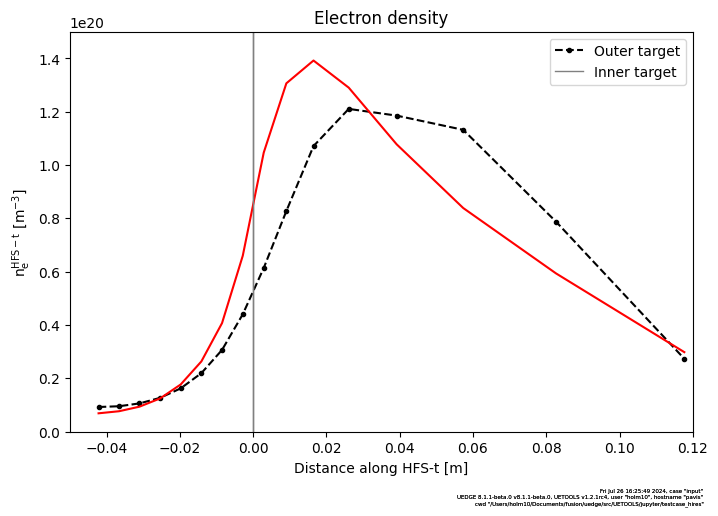

In [9]:
ne_t = c.plot.neOT(
    color='k', 
    linestyle='--', 
    marker='.'
)
c.plot.neIT(
    color='r', 
    ax = ne_t, 
    xlim=(-0.05,0.12), 
    ylim=(0,1.5e20), 
    title='Electron density', 
    logx=False, 
    logy=False
)
ne_t.get_axes()[0].legend(["Outer target", "Inner target"]);

Additional plots of the inner/outer targets are available:

In [10]:
from uetools.UeCase.CasePlot import Caseplot
for prop in dir(Caseplot):
    if ("OT" in prop) or ("IT" in prop):
        print("-", prop)

ModuleNotFoundError: No module named 'uetools.UeCase.CasePlot'

The predefined plot-functions utilize the Case.plotprofile-function, as demonstrated below, and any keyword arguments are passed to this function.

When plotting multi-species parameters, the script plots all species simultaneously by default, so the index must be specified manually:


In [ ]:
ni_ot = c.plot.niOT(
    0, 
    logy=True, 
    marksep=False, 
    ylim=(1e16,2e20)
)
c.plot.niOT(
    1, 
    ax=ni_ot, 
    color='r', 
    logy=True, 
    marksep=False, 
    ylim=(1e16,2e20)
);
c.plot.niOT(
    2, 
    ax=ni_ot, 
    color='b', 
    logy=True, 
    ylim=(1e16,2e20)
);
ni_ot.get_axes()[0].legend(['H+','H0', 'C+']);

## Plotting arbitrary 1D plots<a class="anchor" id="1Dplots"></a>
UETOOLS has two functions for plotting arbitrary line plots, plotprofile and plot. Plot is used to quickly visualize data and tracks a single Figure object as Case.dumpfig, whereas pltprofile returns the Figure object for further use. Plot differs from plotprofile in that every curve is plotted on the same figure, unless the keyword argument new=True is issued:

In [ ]:
help(c.plot.xy)
c.plot.xy(c.get('xcs'), c.get('ti')[:,c.get('iysptrx')]/c.get('ev'), plottype='semilogy') # Start a new figure
c.plot.xy(c.get('xcs'), c.get('te')[:,c.get('iysptrx')]/c.get('ev'), plottype='semilogy', 
        color='r', xlabel='Poloidal distance [m]', ylabel='Temperature [eV]'
      ) # Plot to the same figure

c.plot.xy(c.get('yyrb'), c.get('te')[-2]/c.get('ev'), color='r', new=True) # Plot to new figure
c.plot.xy(c.get('yyrb'), c.get('ti')[-2]/c.get('ev'),ylim=(0, None),
       xlabel='Distance along target [m]', ylabel='Temperature [eV]'
      ) # Continue plotting on new figure



Plotprofile always returns a new Figure object to the user, unless a Figure or Axis object is supplied using keyword argument ax is supplied.

In [ ]:
help(c.plot.profile)
f=c.plot.profile(c.get('yyc'), c.get('te')[c.get('ixmp')]/c.get('ev'), color='r'); # Draw initial figure and store object
c.plot.profile(c.get('yyc'), c.get('ti')[c.get('ixmp')]/c.get('ev'), ax=f, 
                xlabel='$\mathrm{ r-r_{sep}^{LFS-mp}}$ [m]',
                ylabel='$\mathrm{T_{LFS-mp}}$ [eV]'
             ); # Plot on the same object
f.get_axes()[0].legend(['Electrons', 'Ions']); # Access Axis object from Figure object and modify it


In general, Case.plotprofile is recommended when writing plot-scripts, whereas Case.plot is only intended for interactive use to quickly scope parameters. Both functions pass their additional keyword arguments to the Axis.plot-functions.

# 